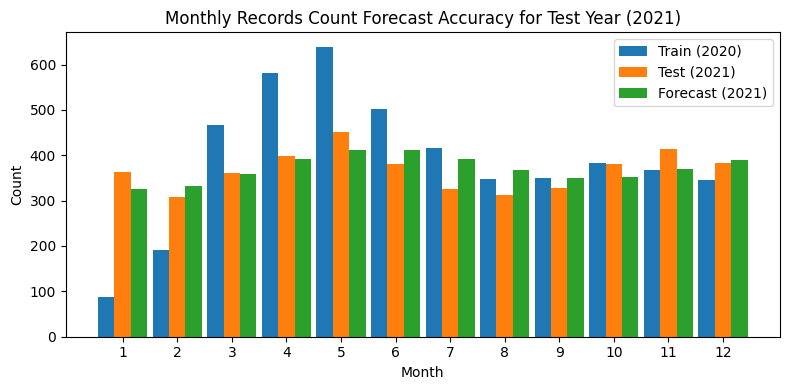

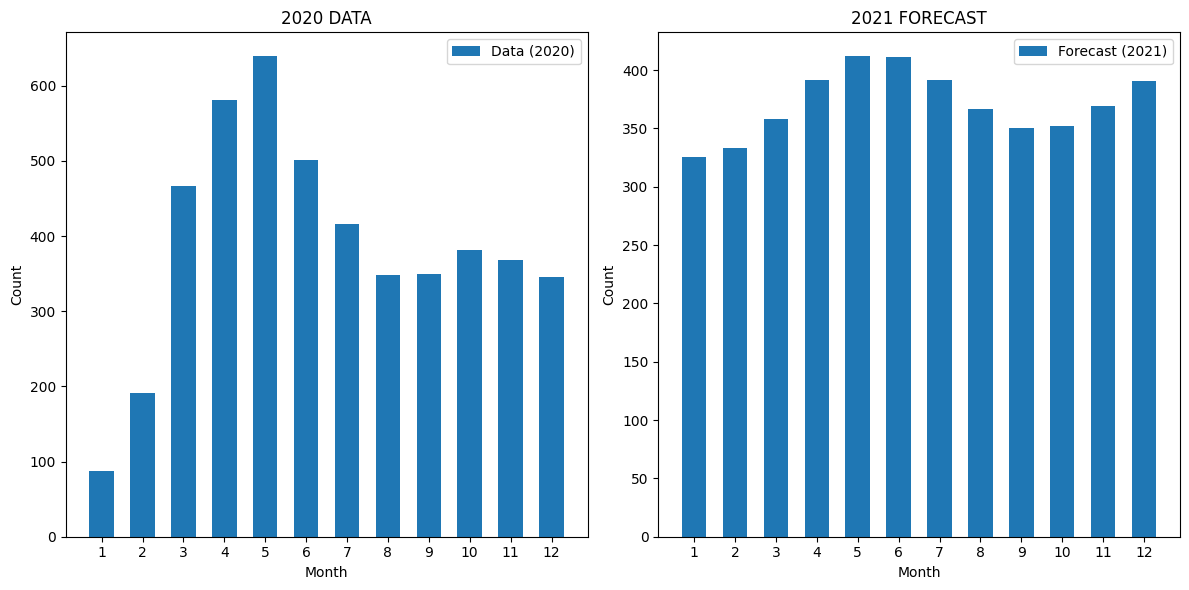

2020 DATA			2021 FORECAST
January: 87			January: 325.65
February: 191			February: 333.2
March: 467			March: 358.33
April: 581			April: 391.96
May: 639			May: 411.84
June: 501			June: 411.64
July: 416			July: 391.4
August: 348			August: 366.48
September: 350			September: 350.16
October: 382			October: 352.21
November: 368			November: 369.01
December: 345			December: 390.53
The highest number of membership applications is expected to be May with a value of 411.84 in 2021.


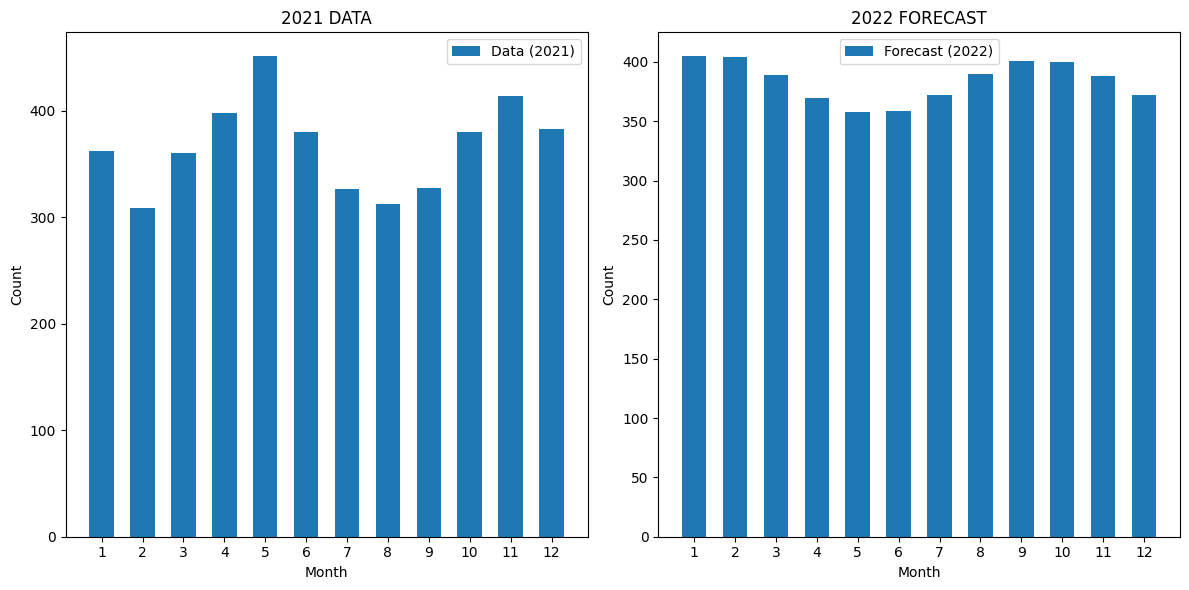

2021 DATA			2022 FORECAST
January: 362			January: 404.69
February: 309			February: 403.75
March: 360			March: 389.21
April: 398			April: 370.01
May: 451			May: 357.55
June: 380			June: 358.64
July: 326			July: 372.14
August: 312			August: 389.69
September: 327			September: 401.09
October: 380			October: 400.03
November: 414			November: 387.73
December: 383			December: 371.73
The highest number of membership applications is expected to be January with a value of 404.69 in 2022.


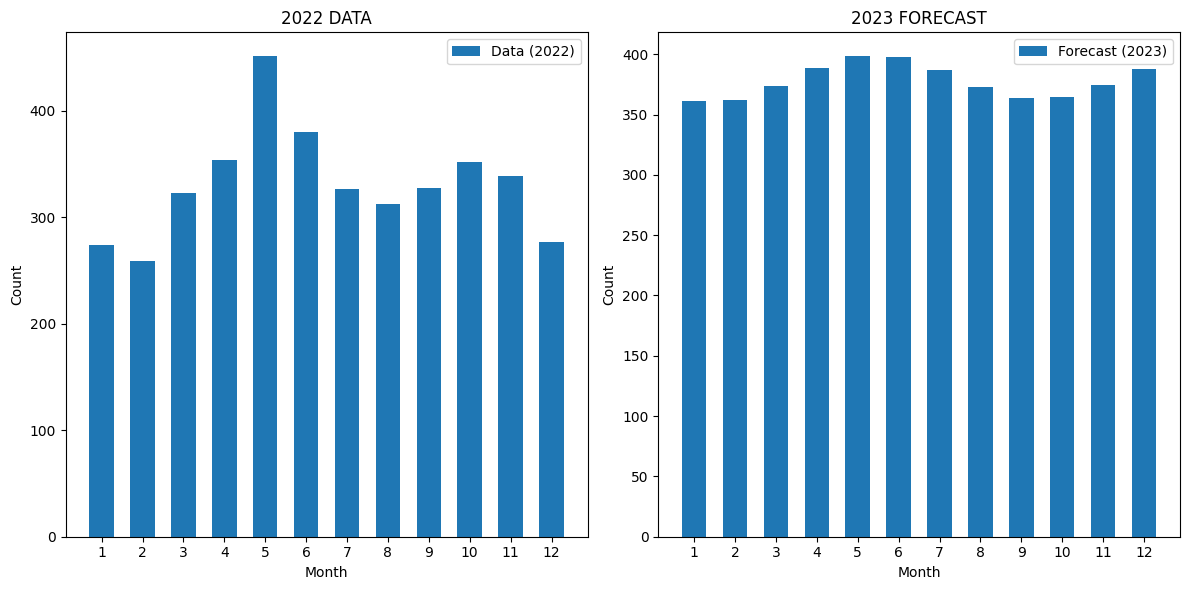

2022 DATA			2023 FORECAST
January: 274			January: 361.15
February: 259			February: 362.05
March: 323			March: 373.39
April: 354			April: 388.4
May: 451			May: 398.21
June: 380			June: 397.38
July: 326			July: 386.63
August: 312			August: 372.54
September: 327			September: 363.28
October: 352			October: 364.1
November: 339			November: 374.16
December: 277			December: 387.43
The highest number of membership applications is expected to be May with a value of 398.21 in 2023.


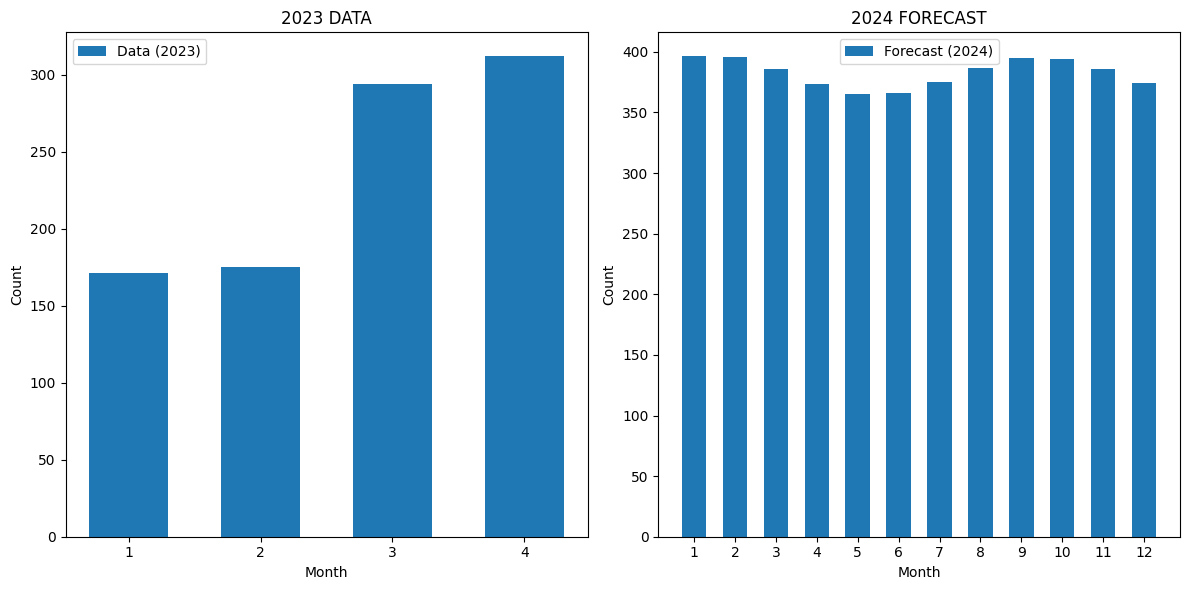

2023 DATA			2024 FORECAST
January: 171			January: 396.28
February: 175			February: 395.65
March: 294			March: 386.23
April: 312			April: 373.62
The highest number of membership applications is expected to be January with a value of 396.28 in 2024.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

# Read the data from the CSV file
df_data = pd.read_csv("gymdata-monstah.csv")
df_data['start_date'] = pd.to_datetime(df_data['start_date'])

# Extract the year and month from the 'Date' column
df_data['Year'] = df_data['start_date'].dt.year
df_data['Month'] = df_data['start_date'].dt.month

# Group and count the records for each year and month
monthly_counts = df_data.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Create the x-axis values
months = np.arange(1, 13)

# Filter the data for training and test based on the desired years
train_data = monthly_counts.loc[monthly_counts['Year'] == 2020]['Count'].values
test_data = monthly_counts.loc[monthly_counts['Year'] == 2021]['Count'].values

# Concatenate all years' data for overall count
all_years_data = monthly_counts['Count'].values

import warnings
warnings.filterwarnings("ignore")

# Use auto_arima to determine the best ARIMA model
model = auto_arima(train_data, seasonal=False)

# Fit the ARIMA model using the training data
model_fit = ARIMA(train_data, order=(4,0,0)).fit()

# Get the forecasted values for the test period
forecast = model_fit.forecast(steps=len(test_data))

# Calculate the bar width
bar_width = 0.3

# Plot the data for the initial forecast (2021)
plt.figure(figsize=(8, 4))
plt.bar(months - bar_width, train_data, width=bar_width, label='Train (2020)')
plt.bar(months, test_data, width=bar_width, label='Test (2021)')
plt.bar(months + bar_width, forecast, width=bar_width, label='Forecast (2021)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Records Count Forecast Accuracy for Test Year (2021)')
plt.legend()
plt.xticks(months)
plt.tight_layout()
plt.show()


### If user pick 2020
# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Calculate the bar width
bar_width = 0.6

# Plot the data for 2020 and 2021
plt.figure(figsize=(12, 6))

# Plot 2020 real data
plt.subplot(1, 2, 1)
plt.bar(months, train_data, width=bar_width, label='Data (2020)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('2020 DATA')
plt.legend()
plt.xticks(months)

# Plot 2021 forecast
plt.subplot(1, 2, 2)
plt.bar(months, forecast, width=bar_width, label='Forecast (2021)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('2021 FORECAST')
plt.legend()
plt.xticks(months)

plt.tight_layout()
plt.show()

# Print 2020 real data count per month and 2021 forecast count per month side by side
print("2020 DATA\t\t\t2021 FORECAST")
for i in range(len(months)):
    print(f"{month_names[i]}: {int(train_data[i])}\t\t\t{month_names[i]}: {round(forecast[i], 2)}")

# Print the highest count in the 2021 forecast
max_forecast_count_2021 = max(forecast)
max_forecast_month_2021 = month_names[forecast.argmax()]
print(f"The highest number of membership applications is expected to be {max_forecast_month_2021} with a value of {float(max_forecast_count_2021):.2f} in 2021.")


### If user pick 2021
# Update the train_data with the forecasted values
train_data = np.concatenate([train_data, forecast])

# Fit the ARIMA model using the training data
model_fit = ARIMA(train_data, order=(4,0,0)).fit()

# Get the forecasted values for the next year
forecast_2022 = model_fit.forecast(steps=12)

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Calculate the bar width
bar_width = 0.6

# Plot the data for 2021 DATA and 2022 FORECAST
plt.figure(figsize=(12, 6))

# Plot 2021 real data
plt.subplot(1, 2, 1)
plt.bar(months, test_data, width=bar_width, label='Data (2021)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('2021 DATA')
plt.legend()
plt.xticks(months)

# Plot 2022 forecast
plt.subplot(1, 2, 2)
plt.bar(months, forecast_2022, width=bar_width, label='Forecast (2022)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('2022 FORECAST')
plt.legend()
plt.xticks(months)

plt.tight_layout()
plt.show()

# Print 2021 real data count per month and 2022 forecast count per month side by side
print("2021 DATA\t\t\t2022 FORECAST")
for i in range(len(months)):
    print(f"{month_names[i]}: {int(test_data[i])}\t\t\t{month_names[i]}: {round(forecast_2022[i], 2)}")
    
# Print the highest count in the 2022 forecast
max_forecast_count_2022 = max(forecast_2022)
max_forecast_month_2022 = month_names[forecast_2022.argmax()]
print(f"The highest number of membership applications is expected to be {max_forecast_month_2022} with a value of {float(max_forecast_count_2022):.2f} in 2022.")


### If user pick 2022
# Get the real data for the next year
real_data_2022 = monthly_counts.loc[monthly_counts['Year'] == 2022]['Count'].values

# Update the train_data with the forecasted values
train_data = np.concatenate([train_data, forecast_2022])

# Fit the ARIMA model using the training data
model_fit = ARIMA(train_data, order=(4,0,0)).fit()

# Get the forecasted values for the next year
forecast_2023 = model_fit.forecast(steps=12)

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Calculate the bar width
bar_width = 0.6

# Plot the data for 2022 DATA and 2023 FORECAST
plt.figure(figsize=(12, 6))

# Plot 2022 real data
plt.subplot(1, 2, 1)
plt.bar(months, real_data_2022, width=bar_width, label='Data (2022)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('2022 DATA')
plt.legend()
plt.xticks(months)

# Plot 2023 forecast
plt.subplot(1, 2, 2)
plt.bar(months, forecast_2023, width=bar_width, label='Forecast (2023)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('2023 FORECAST')
plt.legend()
plt.xticks(months)

plt.tight_layout()
plt.show()

# Print 2022 real data count per month and 2023 forecast count per month side by side
print("2022 DATA\t\t\t2023 FORECAST")
for i in range(len(months)):
    print(f"{month_names[i]}: {int(real_data_2022[i])}\t\t\t{month_names[i]}: {round(forecast_2023[i], 2)}")
    
# Print the highest count in the 2023 forecast
max_forecast_count_2023 = max(forecast_2023)
max_forecast_month_2023 = month_names[forecast_2023.argmax()]
print(f"The highest number of membership applications is expected to be {max_forecast_month_2023} with a value of {float(max_forecast_count_2023):.2f} in 2023.")


### If user pick 2023
# Get the real data for the next year
real_data_2023 = monthly_counts.loc[monthly_counts['Year'] == 2023]['Count'].values

# Define the months for which you have data
months_available = np.arange(1, len(real_data_2023) + 1)

# Update the train_data with the forecasted values
train_data = np.concatenate([train_data, forecast_2023])

# Fit the ARIMA model using the training data
model_fit = ARIMA(train_data, order=(4,0,0)).fit()

# Get the forecasted values for the next year
forecast_2024 = model_fit.forecast(steps=12)

# Define month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Calculate the bar width
bar_width = 0.6

# Plot the data for 2023 DATA and 2024 FORECAST
plt.figure(figsize=(12, 6))

# Plot 2023 real data
plt.subplot(1, 2, 1)
plt.bar(months_available, real_data_2023, width=bar_width, label='Data (2023)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('2023 DATA')
plt.legend()
plt.xticks(months_available)

# Plot 2023 forecast
plt.subplot(1, 2, 2)
plt.bar(months, forecast_2024, width=bar_width, label='Forecast (2024)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('2024 FORECAST')
plt.legend()
plt.xticks(months)

plt.tight_layout()
plt.show()

# Print 2023 real data count per month and 2024 forecast count per month side by side
print("2023 DATA\t\t\t2024 FORECAST")
for i in range(len(months_available)):
    print(f"{month_names[i]}: {int(real_data_2023[i])}\t\t\t{month_names[i]}: {round(forecast_2024[i], 2)}")
    
# Print the highest count in the 2024 forecast
max_forecast_count_2024 = max(forecast_2024)
max_forecast_month_2024 = month_names[forecast_2024.argmax()]
print(f"The highest number of membership applications is expected to be {max_forecast_month_2024} with a value of {float(max_forecast_count_2024):.2f} in 2024.")

In [2]:
test_data.mean()

366.8333333333333

In [3]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE
mae = mean_absolute_error(test_data, forecast)
mae

30.200431211766723

In [4]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
rmse

35.491335384377805

In [5]:
# Calculate MAPE
mape = np.mean(np.abs((test_data - forecast) / test_data)) * 100
mape

8.46790032431789